# BioMassters Dataset

## Intro

BioMassters is a dataset designed for Above Ground Biomass (AGB) estimation using multi-temporal satellite imagery. Introduced by [Nascetti et al. 2023](https://proceedings.neurips.cc/paper_files/paper/2023/hash/40daf2a00278c4bea1b26cd4c8a654f8-Abstract-Datasets_and_Benchmarks.html), the aim is to predict biomass from Sentinel-1 SAR and Sentinel-2 optical time series data. It represents a critical application for climate monitoring, carbon stock assessment, and forest management applications.

## Dataset Characteristics

- **Modalities**: 
  - Sentinel-1 SAR (VV, VH polarizations)
  - Sentinel-2 Optical (11 spectral bands)
- **Spatial Resolution**: 10m ground sample distance
- **Temporal Resolution**: Monthly composites over growing season
- **Spectral Bands**: 
  - S2: 11 bands (B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12)
  - S1: 2 polarizations (VV, VH)
- **Image Dimensions**: 256x256 pixels (2.56km x 2.56km chips)
- **Targets**: Continuous Above Ground Biomass values (Mg/ha)
- **Geographic Distribution**: Finland (boreal forest ecosystems). However, the dataset was released without geospatial information.
- **Temporal Coverage**: Multiple months during growing season

## Dataset Setup and Initialization

In [1]:
from pathlib import Path
from geobench_v2.datamodules import GeoBenchBioMasstersDataModule

# Setup paths
PROJECT_ROOT = Path("../../")

# Initialize datamodule
datamodule = GeoBenchBioMasstersDataModule(
    img_size=256,
    batch_size=8,
    num_workers=4,
    root=PROJECT_ROOT / "data" / "biomassters",
    num_time_steps=4,  # Temporal sampling
    download=True,
)
datamodule.setup("fit")
datamodule.setup("test")

print("BioMassters datamodule initialized successfully!")
print(f"Training samples: {len(datamodule.train_dataset)}")
print(f"Validation samples: {len(datamodule.val_dataset)}")
print(f"Test samples: {len(datamodule.test_dataset)}")

Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
Initializing normalizer from class: ZScoreNormalizer
BioMassters datamodule initialized successfully!
Training samples: 1250
Validation samples: 0
Test samples: 0


## Sample Data Visualization

The dataset combines multi-temporal satellite observations for biomass regression. Each sample contains time series of Sentinel-1 SAR and Sentinel-2 optical imagery with continuous biomass target values:

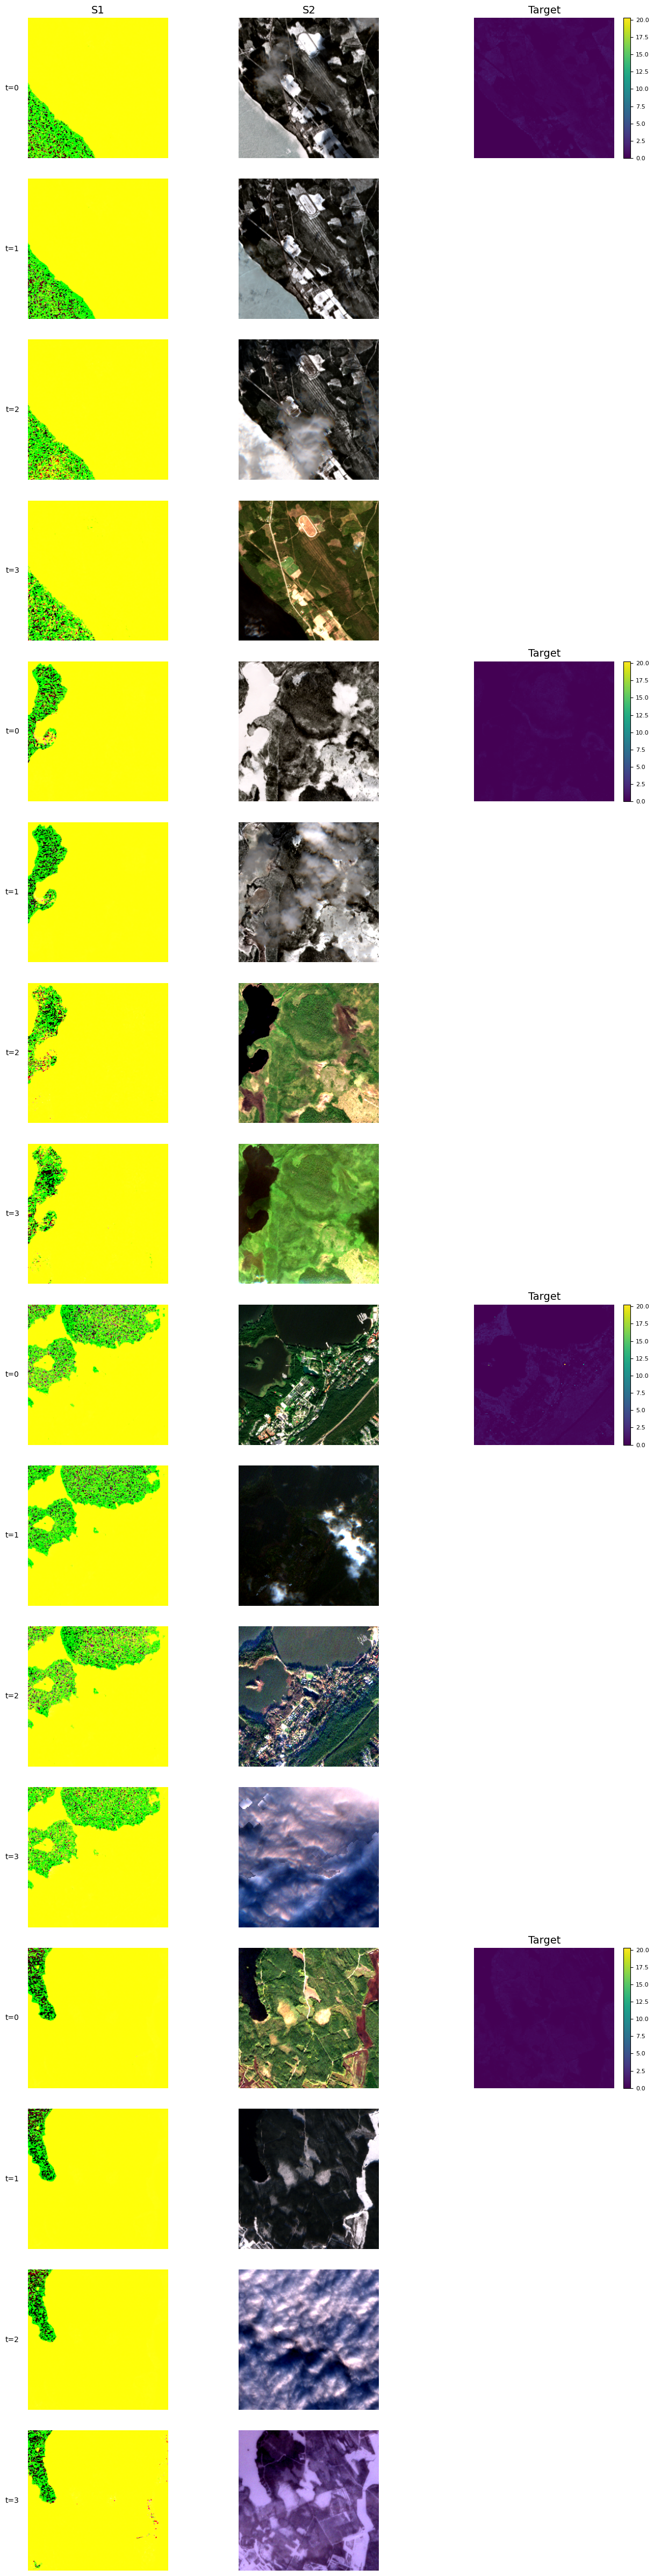

In [3]:
fig, batch = datamodule.visualize_batch()

## GeoBenchV2 Processing Pipeline

### Preprocessing Steps

1. **Split Generation**:
   - Used original train/test splits from competition
   - Created validation split by randomly sampling 20% from training data, since no geospatial info is available

2. **Dataset Subsampling**:
    - The final version consists of
        - 4,000 training time-series samples
        - 1,000 validation time-series samples
        - 2,000 test time-series samples

## References

1. Nascetti, Andrea, Ritu Yadav, Kirill Brodt, Qixun Qu, Hongwei Fan, Yuri Shendryk, Isha Shah, and Christine Chung. "Biomassters: A benchmark dataset for forest biomass estimation using multi-modal satellite time-series." Advances in Neural Information Processing Systems 36 (2023): 20409-20420. https://proceedings.neurips.cc/paper_files/paper/2023/hash/40daf2a00278c4bea1b26cd4c8a654f8-Abstract-Datasets_and_Benchmarks.html
